In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


# Import training data

In [2]:
train_data = pd.read_csv('../input/train.csv')

## Data shape

In [8]:
print("Number of rows in training data: {!s}".format(train_data.shape[0]))
print("Number of columns in training data: {!s}".format(train_data.shape[1]))
print("'{}'".format("', '".join(train_data.columns.values)))

train_data.head(5)

Number of rows in training data: 1804874
Number of columns in training data: 46
'id', 'target', 'comment_text', 'severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino', 'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion', 'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date', 'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit', 'identity_annotator_count', 'toxicity_annotator_count', 'comment_length'


,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,buddhist,christian,female,heterosexual,hindu,homosexual_gay_or_lesbian,intellectual_or_learning_disability,jewish,latino,male,muslim,other_disability,other_gender,other_race_or_ethnicity,other_religion,other_sexual_orientation,physical_disability,psychiatric_or_mental_illness,transgender,white,created_date,publication_id,parent_id,article_id,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,comment_length
0,59848,0.000000,"This is so cool. It's like, 'would you want yo...",0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:41.987077+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,101
1,59849,0.000000,Thank you!! This would make my life a lot less...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:42.870083+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,114
2,59852,0.000000,This is such an urgent design problem; kudos t...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:45.222647+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,86
3,59855,0.000000,Is this something I'll be able to install on m...,0.000000,0.0,0.000000,0.00000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-29 10:50:47.601894+00,2,NaN,2006,rejected,0,0,0,0,0,0.0,0,4,84
4,59856,0.893617,haha you guys are a bunch of losers.,0.021277,0.0,0.021277,0.87234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2015-09-29 10:50:48.488476+00,2,NaN,2006,rejected,0,0,0,1,0,0.0,4,47,36


## Missing values

In [4]:
print("Number of non-Nan values in each column")
train_data.count()

Number of non-Nan values in each column


id                                     1804874
target                                 1804874
comment_text                           1804874
severe_toxicity                        1804874
obscene                                1804874
identity_attack                        1804874
insult                                 1804874
threat                                 1804874
asian                                   405130
atheist                                 405130
bisexual                                405130
black                                   405130
buddhist                                405130
christian                               405130
female                                  405130
heterosexual                            405130
hindu                                   405130
homosexual_gay_or_lesbian               405130
intellectual_or_learning_disability     405130
jewish                                  405130
latino                                  405130
male         

# Distribution and Correlations

## Comment length distribution

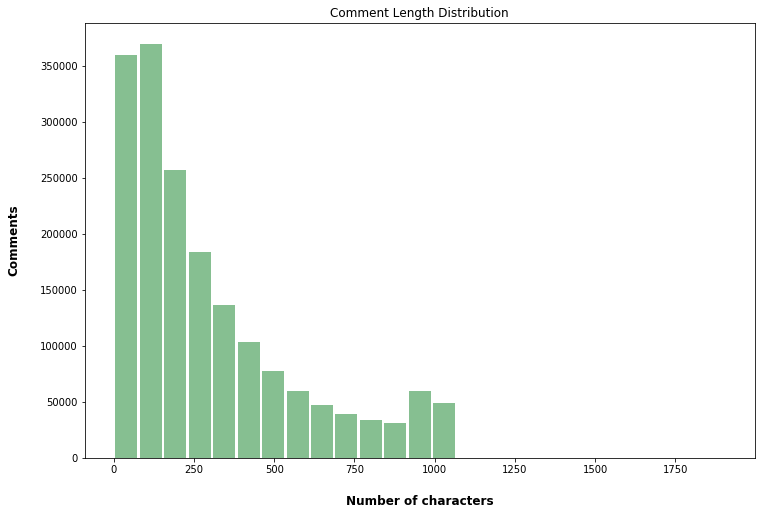

In [13]:
train_data['comment_length'] = train_data['comment_text'].str.len()
ax = train_data.hist(column='comment_length', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
ax = ax[0]
for x in ax:
    # Add title
    x.set_title("Comment Length Distribution")

    # Set x-axis label
    x.set_xlabel("Number of characters", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Comments", labelpad=20, weight='bold', size=12)

## Pairwise correlation

In [6]:
cols = ['severe_toxicity', 'obscene', 'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual', 'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu', 'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability', 'jewish', 'latino', 'male', 'muslim', 'other_disability', 'other_gender', 'other_race_or_ethnicity', 'other_religion', 'other_sexual_orientation', 'physical_disability', 'psychiatric_or_mental_illness', 'transgender', 'white', 'funny', 'wow', 'sad', 'likes', 'disagree', 'sexual_explicit', 'identity_annotator_count', 'toxicity_annotator_count', 'comment_length']
target_col = 'target'
pairwise_correlation = []

for col in cols:
    # Compute pairwise correlation of columns, excluding NA/null values.
    corr = train_data[col].corr(train_data[target_col])
    #print("Correlation between {} and {}: {:f}".format(target_col, col, corr))
    pairwise_correlation.append({'Score': corr, 'Feature': col})

correlation_df = pd.DataFrame(pairwise_correlation)
correlation_df.sort_values(by=['Score'], ascending=False)

,Feature,Score
3,insult,0.928207
1,obscene,0.493058
2,identity_attack,0.450017
0,severe_toxicity,0.393425
4,threat,0.287761
34,sexual_explicit,0.252507
36,toxicity_annotator_count,0.236597
28,white,0.194012
8,black,0.167224
19,muslim,0.134491


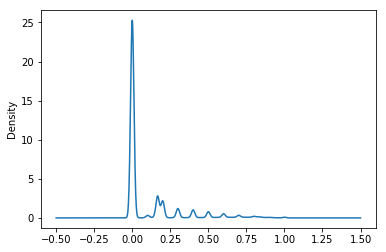

In [7]:
# Generate Kernel Density Estimate plot using Gaussian kernels.
# In statistics, kernel density estimation (KDE) is a non-parametric way to estimate the probability density function (PDF) of a random variable. This function uses Gaussian kernels and includes automatic bandwidth determination.

train_data['target'].plot.kde()